# EDA on Chexpert dataset

> Processed dataset has all the Na's and -1's filled with 0's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset - stored at _data/processed/train.csv_

In [18]:
df_raw = pd.read_csv('/workspaces/chexpert/data/raw/CheXpert-v1.0-small/train.csv')
df_processed = pd.read_csv('/workspaces/chexpert/data/processed/train.csv')

In [19]:
df_raw.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [20]:
df_processed.head()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Fracture,Support Devices,No Finding
0,data/raw/CheXpert-v1.0-small/train/patient3641...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,data/raw/CheXpert-v1.0-small/train/patient6122...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,data/raw/CheXpert-v1.0-small/train/patient3195...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,data/raw/CheXpert-v1.0-small/train/patient1327...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,data/raw/CheXpert-v1.0-small/train/patient1878...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Total Images = 223414

In [82]:
len(df_raw)

223414

Size of training data: 178731

In [21]:
len(df_processed)

178731

Frontal and Lateral Images

In [79]:
count_frontal = df_raw['Frontal/Lateral'].str.contains('Frontal', na=False).sum()
count_frontal

191027

In [81]:
count_lateral = df_raw['Frontal/Lateral'].str.contains('Lateral', na=False).sum()
count_lateral

32387

In [23]:
df_raw.describe()

,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
count,223414.000000,22381.0,44839.000000,46203.000000,117778.000000,11944.000000,85956.000000,70622.000000,27608.000000,68443.000000,78934.000000,133211.000000,6492.000000,12194.000000,123217.000000
mean,60.430653,1.0,-0.035795,0.409346,0.848911,0.644508,0.456769,-0.183498,-0.461134,-0.005304,0.206540,0.559706,0.134011,0.688699,0.932680
std,17.820925,0.0,0.718442,0.769323,0.472571,0.691607,0.741785,0.753980,0.828249,0.990244,0.493529,0.648859,0.966183,0.565435,0.283377
min,0.000000,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,1.0,-1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000
50%,62.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,74.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df_processed.describe()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Fracture,Support Devices,No Finding
count,178731.000000,178731.000000,178731.000000,178731.000000,178731.000000,178731.000000,178731.000000,178731.000000,178731.000000,178731.000000,178731.000000,178731.000000,178731.000000,178731.000000
mean,0.149241,0.120919,0.065786,0.234123,0.385070,0.015588,0.027225,0.087450,0.047910,0.472565,0.041263,0.040239,0.519680,0.100218
std,0.356327,0.326034,0.247908,0.423450,0.486613,0.123874,0.162740,0.282494,0.213576,0.499248,0.198899,0.196520,0.499614,0.300291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df_raw.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

Age, Sex, F/L, AP/PA are dropped in processed data and columns have been reordered alphabetically

In [25]:
df_processed.columns

Index(['Path', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax',
       'Enlarged Cardiomediastinum', 'Lung Opacity', 'Lung Lesion', 'Fracture',
       'Support Devices', 'No Finding'],
      dtype='object')

In [43]:
count = []
def print_count(df):
    for i in range(1,len(df.columns)):
        print(df.columns[i], df[df.columns[i]].sum())
        count.append(df[df.columns[i]].sum())

Counts of diseases in X-ray images

In [44]:
print_count(df_processed)

Atelectasis 26674.0
Cardiomegaly 21612.0
Consolidation 11758.0
Edema 41845.0
Pleural Effusion 68824.0
Pleural Other 2786.0
Pneumonia 4866.0
Pneumothorax 15630.0
Enlarged Cardiomediastinum 8563.0
Lung Opacity 84462.0
Lung Lesion 7375.0
Fracture 7192.0
Support Devices 92883.0
No Finding 17912.0


In [122]:
ct = df_processed[df_processed.columns[1:]].apply(pd.Series.value_counts, dropna=False).T
ct.drop([2.0,3.0,4.0,5.0,6.0,7.0], axis=1)

,0.0,1.0
Atelectasis,152057.0,26674.0
Cardiomegaly,157119.0,21612.0
Consolidation,166973.0,11758.0
Edema,136886.0,41845.0
Pleural Effusion,109907.0,68824.0
Pleural Other,175945.0,2786.0
Pneumonia,173865.0,4866.0
Pneumothorax,163101.0,15630.0
Enlarged Cardiomediastinum,170168.0,8563.0
Lung Opacity,94269.0,84462.0


<BarContainer object of 14 artists>

Text(0.5, 1.0, 'Number of +ve vs Disease')

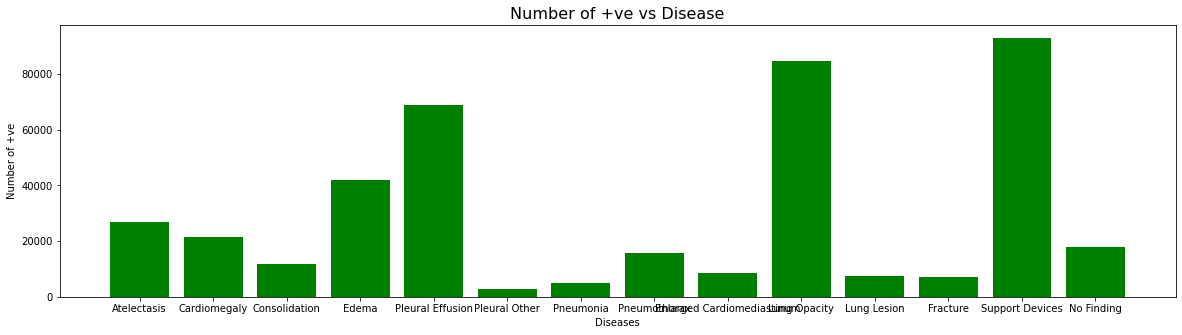

In [56]:
#plt.plot(df_processed.columns[1:], count, color='g',marker='o')
plt.figure(figsize=(20, 5))
display(plt.bar(df_processed.columns[1:], count, color='g'))
plt.xlabel('Diseases')
plt.ylabel('Number of +ve')
plt.title('Number of +ve vs Disease', fontsize = 16)

Number of diseases diagnosed for each patient

In [93]:
df_processed['num_disease'] = df_processed[['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture']].astype(int).sum(axis=1)

In [98]:
df_processed[['Path','num_disease']]

,Path,num_disease
0,data/raw/CheXpert-v1.0-small/train/patient3641...,2
1,data/raw/CheXpert-v1.0-small/train/patient6122...,2
2,data/raw/CheXpert-v1.0-small/train/patient3195...,0
3,data/raw/CheXpert-v1.0-small/train/patient1327...,4
4,data/raw/CheXpert-v1.0-small/train/patient1878...,1
...,...,...
178726,data/raw/CheXpert-v1.0-small/train/patient2234...,4
178727,data/raw/CheXpert-v1.0-small/train/patient5577...,3
178728,data/raw/CheXpert-v1.0-small/train/patient0750...,3
178729,data/raw/CheXpert-v1.0-small/train/patient2704...,0


In [107]:
print('Num of person with more than 1 disease: ', len(df_processed[df_processed['num_disease']>1]))
print('Num of person with more than 2 disease: ', len(df_processed[df_processed['num_disease']>2]))
print('Num of person with more than 3 disease: ', len(df_processed[df_processed['num_disease']>3]))

Num of person with more than 1 disease:  98288
Num of person with more than 2 disease:  43486
Num of person with more than 3 disease:  11241
